# Занятие 4: Введение в машинное обучение (Machine Learning)

Добро пожаловать в новую часть курса — **первые шаги в ML!**  
Сегодня мы узнаем, как компьютеры учатся на данных, и создадим свою первую предсказательную модель.

## 1. Что такое машинное обучение?

Машинное обучение (Machine Learning, ML) — это способ научить компьютер **делать выводы из данных**.

Вместо того чтобы вручную прописывать правила, мы даем модели **примеры входов и правильных ответов**, и она сама ищет закономерности.

**Пример:**
> У нас есть данные о студентах — сколько часов они готовились и сдали ли экзамен.  
> Мы хотим предсказать, сдадут ли другие студенты, зная их данные.

**Ключевая идея:**  
Компьютер ≠ калькулятор.  
Компьютер учится из опыта, как человек.

**Примеры из жизни:**
- Рекомендации фильмов в Netflix или YouTube.  
- Предсказание, что вы купите в интернет-магазине.  
- Автомобили с автопилотом.  
- Диагностика болезней по снимкам.  
- Распознавание речи и перевод текстов.

## 2. Основные типы задач машинного обучения

| Тип задачи | Что делает | Пример |
|-------------|-------------|---------|
| **Классификация** | Определяет категорию | Да/нет, класс A/B |
| **Регрессия** | Предсказывает число | Цена дома, возраст человека |
| **Кластеризация** | Находит группы внутри данных | Разделение клиентов по интересам |

На этом занятии мы будем решать **задачу классификации** — предсказывать, **сдаст ли студент экзамен (1) или нет (0)**.

## 3. Как работают нейронные сети внутри?

**Нейронные сети** — это один из самых популярных подходов в машинном обучении, вдохновленный работой человеческого мозга.

**Основные компоненты нейронной сети:**

* **Нейроны** — базовые "клетки" сети, которые обрабатывают информацию

* **Слои** — группы нейронов, соединенные между собой:

    * **Входной слой** — получает исходные данные (например, часы учебы и посещаемость)

    * **Скрытые слои** — промежуточные слои, которые находят сложные закономерности

    * **Выходной слой** — выдает окончательный результат (сдаст/не сдаст)

* **Веса** — числовые коэффициенты, которые показывают "силу" связи между нейронами

* **Смещения** — дополнительные параметры, которые помогают сети лучше обучаться

**Процесс работы:**

* **Прямое распространение:** Данные проходят от входа к выходу через все слои

* **Каждый нейрон** умножает входные данные на веса, складывает и применяет специальную функцию активации

* **Обучение:** Сравнивается предсказание с правильным ответом, и веса постепенно корректируются, чтобы уменьшить ошибку

![Простая нейронная сеть с входным, скрытым и выходным слоями](https://habrastorage.org/getpro/habr/upload_files/718/a95/a55/718a95a55993a65f4ba6092286a49ddb.jpeg)

## 3. Этапы ML-проекта (пайплайн)

Любой ML-проект можно разбить на понятные шаги:

1. **Сбор данных** — где взять данные?  
2. **Очистка данных** — удаляем пропуски, исправляем ошибки.  
3. **Преобразование данных** — превращаем текст/категории в числа.  
4. **Разделение данных** — делим на обучение и тест.  
5. **Обучение модели** — "учим" компьютер на тренировочной выборке.  
6. **Оценка модели** — проверяем качество на тестовых данных.  
7. **Улучшение** — добавляем признаки, меняем модель, настраиваем параметры.

![ML](https://www.altexsoft.com/media/2020/05/word-image-43.png)

### 3.1 Визуальная схема пайплайна

Вот как выглядит **типичный ML-пайплайн**:

**Данные** → **Подготовка** → **Обучение модели** → **Оценка** → **Применение**

![ML workflow](https://lh3.googleusercontent.com/bw1PXOTbmwnmMrVWeRtwVZiqEASXuuS1NrIIsQa3xDCMgYxMqugky0brO0BuSld4TwzPv5dCzuAa0e9br8fBVlZxqITzSYqwNeGfzqQyscbm8Xu1lLDFhh12N4QlyXdtqBNEVVZH)

## 4. Практика: предсказание сдаст ли студент экзамен (Exam V1)

Ниже мы создадим искусственные данные: сколько студент занимался и сдал ли он экзамен.

Чтобы смоделировать реальные данные, мы создаем синтетический набор с помощью `numpy`.  
Каждый студент описывается тремя параметрами:

- **hours_studied** — сколько часов он готовился
- **attendance** — посещаемость в процентах
- **passed** — сдал (1) или не сдал (0)

Формула для вычисления `passed` выглядит так:

```python
passed = (hours_studied * 0.8 + attendance * 0.05 + np.random.normal(0, 2, n)) > 10
```

- `hours_studied * 0.8` — чем больше студент учится, тем выше шанс сдать.

- `attendance * 0.05` — посещаемость тоже добавляет баллы.

- `np.random.normal(0, 2, n)` — добавляем шум, чтобы имитировать реальную жизнь (иногда студент просто не повезло).

- `> 10` — это порог: если итоговая сумма выше 10, студент сдал.

Шум (`random.normal`) нужен, чтобы модель не запомнила линейную зависимость идеально — это как «случайность» в данных (экзамен, настроение, стресс и т.д.).

In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

np.random.seed(42)

n = 200

hours_studied = np.clip(np.random.normal(6, 1, n), 0, 10)
attendance = np.random.uniform(30, 100, n)
passed = (hours_studied * 0.8 + attendance * 0.05 - np.clip(np.random.normal(0, 1, n), 0, 1)) > 6.8


#hours_studied = np.random.normal(8, 1, n)
#attendance = np.random.uniform(50, 100, n)
#passed = (hours_studied * 0.8 + attendance * 0.05 - np.random.normal(0, 4, n)) > 10

df = pd.DataFrame({
    "hours_studied": hours_studied,
    "attendance": attendance,
    "passed": passed.astype(int)
})

print("Общее количество студентов:", len(df))
print("Сдало экзамен:", df['passed'].sum())
print("Не сдало:", len(df) - df['passed'].sum())
print("Среднее:", df['hours_studied'].describe())

df.head()


Общее количество студентов: 200
Сдало экзамен: 142
Не сдало: 58
Среднее: count    200.000000
mean       5.959229
std        0.931004
min        3.380255
25%        5.294872
50%        5.995808
75%        6.500852
max        8.720169
Name: hours_studied, dtype: float64


,hours_studied,attendance,passed
0,6.496714,91.416115,1
1,5.861736,81.853803,1
2,6.647689,78.791102,1
3,7.523030,79.173886,1
4,5.765847,55.164381,1


### 4.1 Визуализируем данные

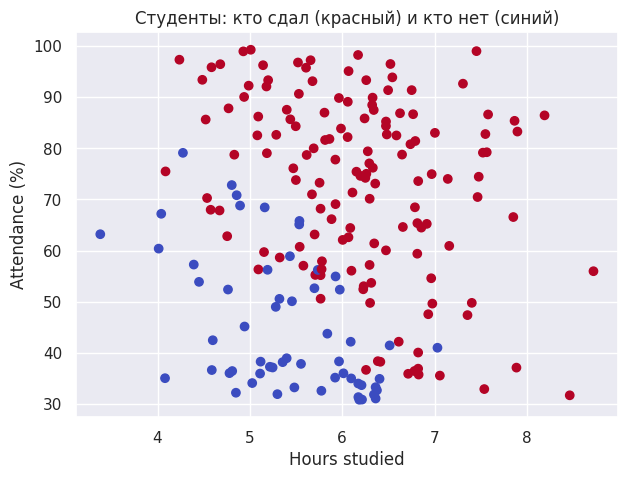

In [302]:
plt.figure(figsize=(7,5))
plt.scatter(df['hours_studied'], df['attendance'], c=df['passed'], cmap='coolwarm')
plt.xlabel('Hours studied')
plt.ylabel('Attendance (%)')
plt.title('Студенты: кто сдал (красный) и кто нет (синий)')
plt.show()

### 4.2 Обучим простую модель

In [303]:
X = df[['hours_studied', 'attendance']]
y = df['passed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)

print(f"Train accuracy: {train_acc:.2f}")
print(f"Test accuracy:  {test_acc:.2f}")
print("Confusion matrix:\n", cm)


Train accuracy: 0.87
Test accuracy:  0.90
Confusion matrix:
 [[10  2]
 [ 2 26]]


**Процесс обучения модели**

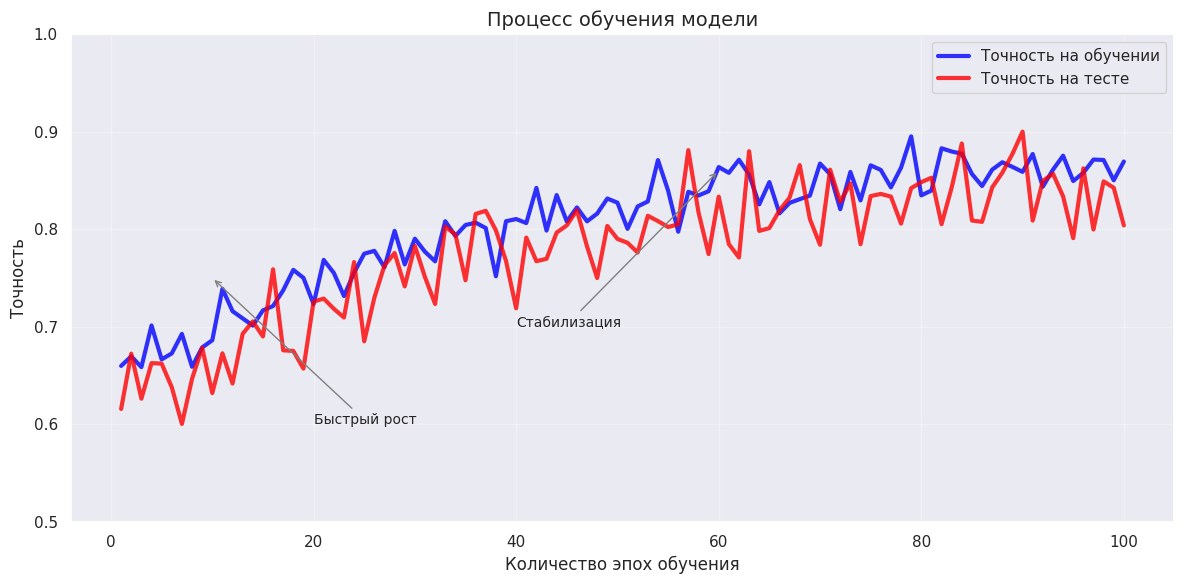

## 5. Оценка модели

**Accuracy (точность)** — показывает, какой процент ответов модель предсказала правильно.

Confusion Matrix (матрица ошибок) помогает понять, где модель ошибается:

- Левая верхняя ячейка — правильно предсказанные "0"

- Правая нижняя — правильно предсказанные "1"

- Остальные — ошибки

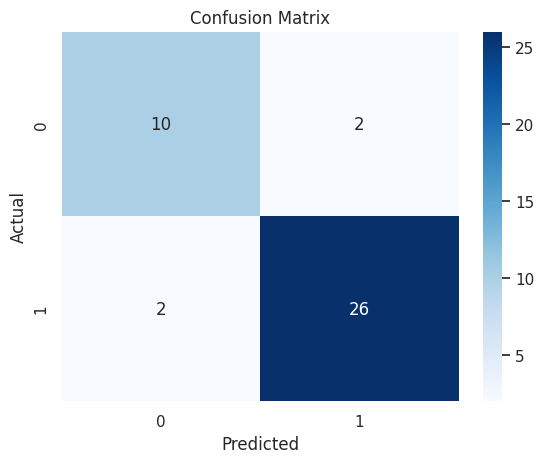

In [283]:
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## 6. Переобучение и недообучение

Теперь давайте поиграем с параметрами и посмотрим, что произойдет.

Создадим шум в данных и усложним модель.

In [339]:
from sklearn.tree import DecisionTreeClassifier

# можно менять параметры
PARAMS = {
    'noise': 0.2,      # шум в данных (0 - идеально, 1 - очень шумно)
    'max_depth': 2    # глубина дерева (чем больше — тем сложнее модель)
}

# создаем новый набор данных
X_noisy = X + np.random.normal(0, PARAMS['noise'], X.shape)

tree = DecisionTreeClassifier(max_depth=PARAMS['max_depth'], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Noise = {PARAMS['noise']}, max_depth = {PARAMS['max_depth']}")
print(f"Accuracy: {acc:.2f}")


Noise = 0.2, max_depth = 2
Accuracy: 0.75


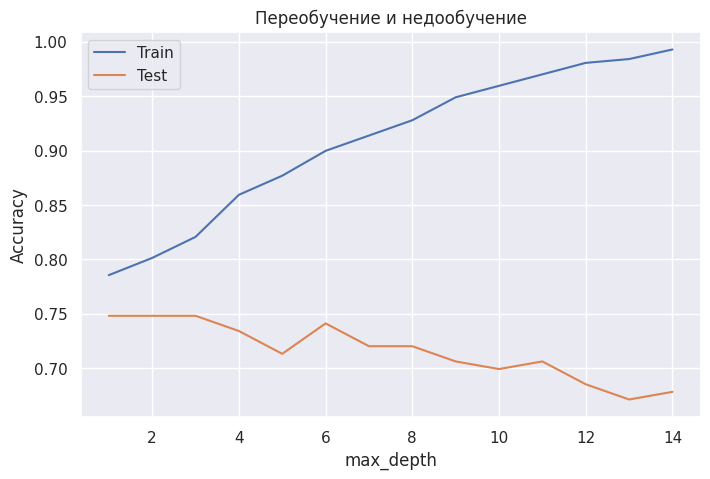

In [344]:
from sklearn.tree import DecisionTreeClassifier

train_scores, test_scores = [], []
depths = range(1, 15)

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(depths, train_scores, label='Train')
plt.plot(depths, test_scores, label='Test')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Переобучение и недообучение')
plt.legend()
plt.show()

Слишком сложная модель может **переобучаться** — хорошо работает на обучении, но плохо на новых данных.

- При малой глубине дерева (1–2) модель не может уловить зависимости — недообучение.

- При большой глубине (10–15) — идеально запоминает обучающие данные, но плохо обобщает — переобучение.

## 7. Усложняем модель (Exam V2)

Теперь добавим больше факторов:

- количество сданных домашних заданий

- количество часов сна

- средний балл за семестр

In [345]:
np.random.seed(42)
n = 400

hours = np.random.normal(5, 2, n)
attendance = np.random.uniform(40, 100, n)
assignments = np.random.randint(5, 11, n)
sleep_hours = np.random.normal(7, 1.5, n)
avg_grade = np.random.normal(75, 10, n)

passed = (hours*0.6 + attendance*0.02 + assignments*0.5 + sleep_hours*0.3 + avg_grade*0.06 - np.random.normal(0,1,n)) > 13

df2 = pd.DataFrame({
    "hours": hours,
    "attendance": attendance,
    "assignments": assignments,
    "sleep_hours": sleep_hours,
    "avg_grade": avg_grade,
    "passed": passed.astype(int)
})

print("Общее количество студентов:", len(df2))
print("Сдало экзамен:", df2['passed'].sum())
print("Не сдало:", len(df2) - df2['passed'].sum())
print("Среднее:", df2['hours'].describe())

df2.head()


Общее количество студентов: 400
Сдало экзамен: 319
Не сдало: 81
Среднее: count    400.000000
mean       5.045097
std        1.920609
min       -1.482535
25%        3.689113
50%        5.118439
75%        6.261403
max       12.705463
Name: hours, dtype: float64


,hours,attendance,assignments,sleep_hours,avg_grade,passed
0,5.993428,64.889170,10,7.263319,68.495870,1
1,4.723471,56.404424,5,7.612769,80.296931,1
2,6.295377,43.382530,6,6.720441,49.742814,0
3,8.046060,91.883343,9,6.393001,75.639568,1
4,4.531693,88.774061,5,6.455564,71.282871,0


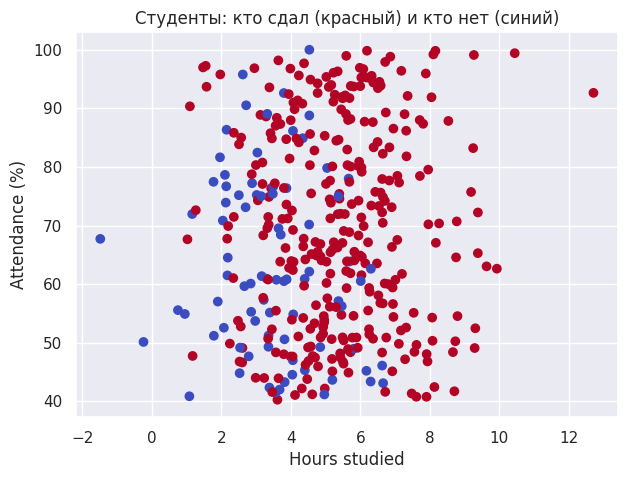

In [346]:
plt.figure(figsize=(7,5))
plt.scatter(df2['hours'], df2['attendance'], c=df2['passed'], cmap='coolwarm')
plt.xlabel('Hours studied')
plt.ylabel('Attendance (%)')
plt.title('Студенты: кто сдал (красный) и кто нет (синий)')
plt.show()

### 7.1 Обучим и сравним две модели

In [349]:
from sklearn.ensemble import RandomForestClassifier

X = df2[['hours', 'attendance', 'assignments', 'sleep_hours']]
y = df2['passed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: accuracy = {acc:.2f}")


Logistic Regression: accuracy = 0.87
Random Forest: accuracy = 0.86


Train accuracy: 1.00
Test accuracy:  0.86


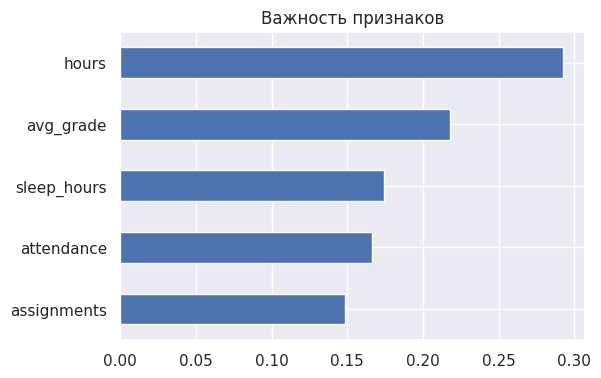

In [353]:
from sklearn.ensemble import RandomForestClassifier

X = df2[['hours', 'attendance', 'assignments', 'sleep_hours', 'avg_grade']]
y = df2['passed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print(f"Train accuracy: {rf.score(X_train, y_train):.2f}")
print(f"Test accuracy:  {rf.score(X_test, y_test):.2f}")

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(6,4))
plt.title('Важность признаков')
plt.show()


## 8. Titanic dataset

Теперь попробуем применить те же принципы к датасету Титаник.